In [8]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [9]:
Image_Width=128
Image_Height=128
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

In [10]:
filenames=os.listdir(r"C:\Users\kaust\OneDrive\Desktop\MSTC")
categories=[]
for f_name in filenames:
    category=f_name.split(' ')[0]
    if category=='Notes':
        categories.append(1)
    else:
        categories.append(0)
df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})


In [11]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization

model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])


In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)       

In [13]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)
callbacks = [earlystop,learning_rate_reduction]

In [14]:
df["category"] = df["category"].replace({0:'Non_notes',1:'Notes'})
train_df,validate_df = train_test_split(df,test_size=0.20,random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)
total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=15

In [15]:
df

,filename,category
0,Non_notes (1).png,Non_notes
1,Non_notes (10).jpg,Non_notes
2,Non_notes (100).jpg,Non_notes
3,Non_notes (101).jpg,Non_notes
4,Non_notes (102).jpg,Non_notes
5,Non_notes (103).jpg,Non_notes
6,Non_notes (104).jpg,Non_notes
7,Non_notes (105).jpg,Non_notes
8,Non_notes (106).jpg,Non_notes
9,Non_notes (107).jpg,Non_notes


In [16]:
train_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )
train_generator = train_datagen.flow_from_dataframe(train_df,
                                                 r"C:\Users\kaust\OneDrive\Desktop\MSTC",x_col='filename',y_col='category',
                                                 target_size=Image_Size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size)
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    r"C:\Users\kaust\OneDrive\Desktop\MSTC", 
    x_col='filename',
    y_col='category',
    target_size=Image_Size,
    class_mode='categorical',
    batch_size=batch_size
)


Found 815 validated image filenames belonging to 2 classes.
Found 204 validated image filenames belonging to 2 classes.


In [17]:
epochs=10
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/10
54/54 [==============================] - 175s 3s/step - loss: 0.3434 - accuracy: 0.9100 - val_loss: 7.8804 - val_accuracy: 0.4615
Epoch 2/10


C:\Users\kaust\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


54/54 [==============================] - 151s 3s/step - loss: 0.1596 - accuracy: 0.9613 - val_loss: 8.4820 - val_accuracy: 0.4656
Epoch 3/10
54/54 [==============================] - 147s 3s/step - loss: 0.1521 - accuracy: 0.9519 - val_loss: 7.3898 - val_accuracy: 0.4709
Epoch 4/10
54/54 [==============================] - 143s 3s/step - loss: 0.0959 - accuracy: 0.9747 - val_loss: 5.5085 - val_accuracy: 0.4339
Epoch 5/10
54/54 [==============================] - 149s 3s/step - loss: 0.0960 - accuracy: 0.9737 - val_loss: 7.1768 - val_accuracy: 0.4868
Epoch 6/10
54/54 [==============================] - 149s 3s/step - loss: 0.1854 - accuracy: 0.9538 - val_loss: 2.4708 - val_accuracy: 0.4868
Epoch 7/10
54/54 [==============================] - 140s 3s/step - loss: 0.0795 - accuracy: 0.9750 - val_loss: 4.9116 - val_accuracy: 0.4921
Epoch 8/10
54/54 [==============================] - 134s 2s/step - loss: 0.1184 - accuracy: 0.9737 - val_loss: 2.1807 - val_accuracy: 0.4762
Epoch 9/10
54/54 [======

In [19]:
test_filenames = os.listdir(r"C:\Users\kaust\OneDrive\Desktop\MSTC_test")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]
    

In [20]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    test_df, 
    r"C:\Users\kaust\OneDrive\Desktop\MSTC_test", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=Image_Size,
    batch_size=batch_size,
    shuffle=False
)


Found 160 validated image filenames.


In [21]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

In [22]:
test_df['category'] = np.argmax(predict, axis=-1)

In [23]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)


In [24]:
test_df['category'] = test_df['category'].replace({ 'Notes': 1, 'Non_notes': 0 })

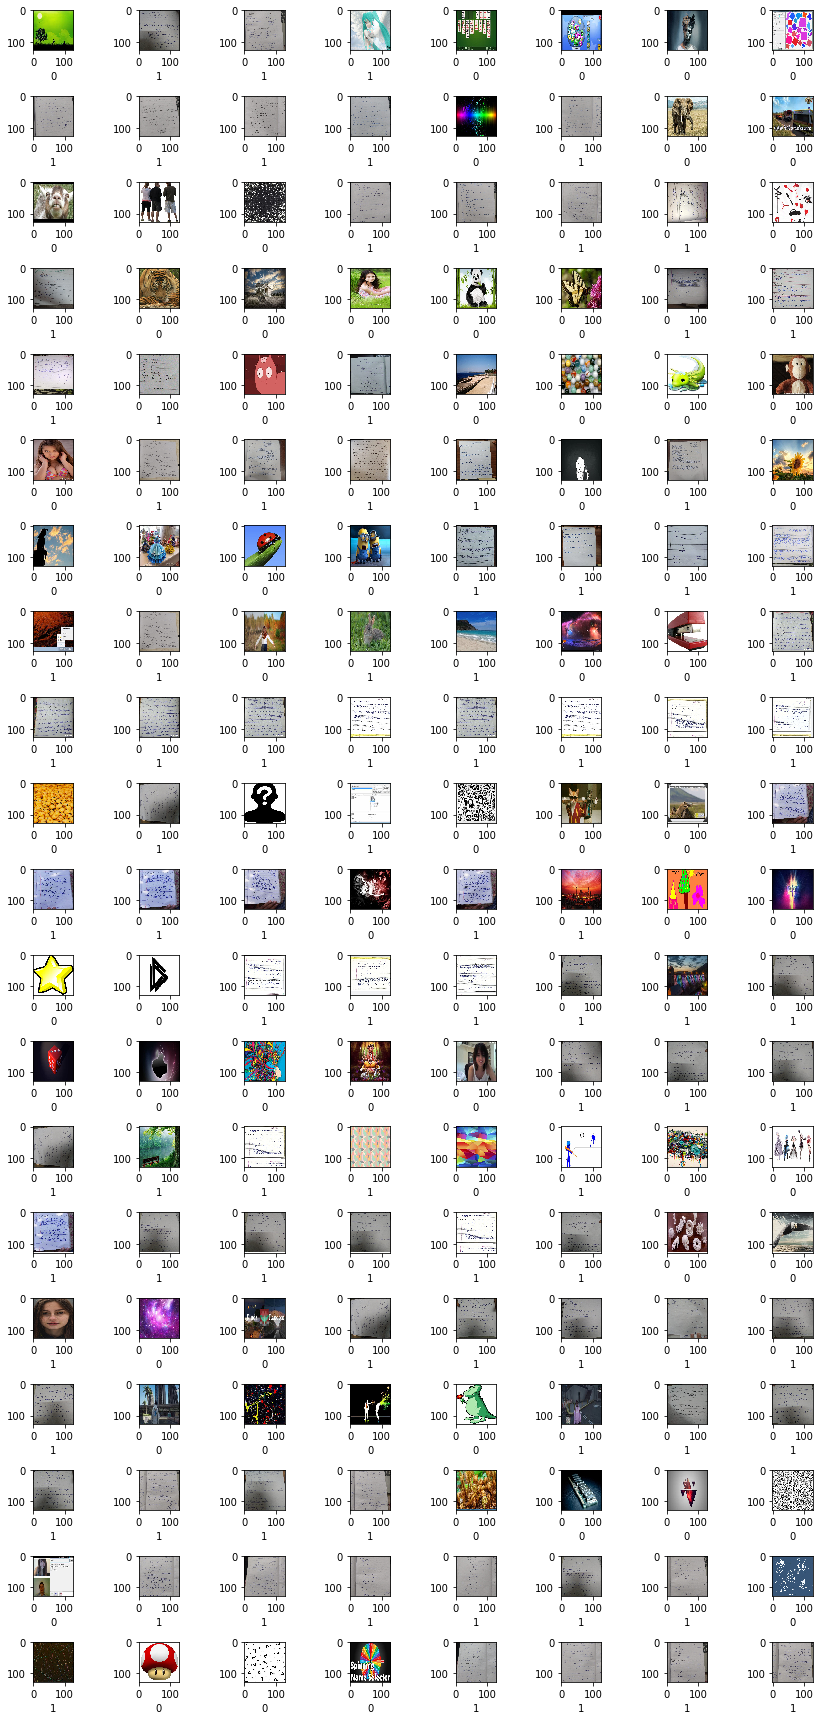

In [37]:
sample_test = test_df
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img(r"C:\Users\kaust\OneDrive\Desktop\MSTC_test\\"+filename, target_size=Image_Size)
    plt.subplot(20, 8, index+1)
    plt.imshow(img)
    plt.xlabel(category)
plt.tight_layout()
plt.show()

In [38]:
model.save("KaustubhDwivedi.h5")

In [40]:
import pickle
filename = 'KaustubhDwivedi.sav'
pickle.dump(model, open(filename, 'wb'))

In [42]:
import pickle
s = pickle.dumps(model)

In [43]:
Pkl_Filename = "KaustubhDwivedi.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)
